# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we conider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy as sp

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two normal distributions of discrete variables with ($\mu_X=25,\sigma_X=5$) and ($\mu_Y=60,\sigma_Y=10$) that describe the *Age* and the *Weight* of a population. From $X$ and $Y$ sample the *Age* and the *Weight* of $n=500000$ individuals.

In [103]:
import numpy as np
np.random.seed(1)
# TODO: use np.random.normal to initialize X and Y and round() function for discretization of the data
X = np.random.normal(25,5,500000)
Y = np.random.normal(60,10,500000)
X = X.round()
Y=Y.round()

**a)** Find the mean, the median and the mode for $X,Y$. 

In [104]:
def count_dictionary(X):
    """
    Input: certain list of data   
    Output: counts of list elements as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2, 1:1, 2:3, 3:1}
    """
    # TODO: the calculation process of counts
    # We need counts also for later when we are computing the empirical PMF
    count={}
    for i in X:
        if i not in count:
            count[i]=1
        else:
            count[i]+=1
    return count

def compute_mean(X):
    """
    Input: certain list of data   
    Output: mean of this list   
    """
    # TODO: the calculation process of mean
    return sum(X)/len(X)

def compute_median(X):
    """
    Input: certain list of data   
    Output: median of this list
    Tip:Note: If the number of data values is odd, returns the exact middle value. 
    If the number of data values is even, returns the average of the two middle values.   
    """
    # TODO: the calculation process of median
    if len(X) % 2 == 1:
        median=sorted(X)[int(len(X)//2)]
    else:
        median=(sorted(X)[len(X)//2]+sorted(X)[len(X)//2-1])/2
    return median
def compute_mode(X):
    """
    Input: certain list of data   
    Output: element with highest frequency 
    Hint: You can use function count_dictionary   
    """
    # TODO: the calculation process of mode  
    count=count_dictionary(X)
    mode=max(count, key=count.get)
    return mode


x_mean = compute_mean(X)
x_median = compute_median(X)
x_mode = compute_mode(X)

print(f"Mean: {x_mean}\nMedian: {x_median}\nMode: {x_mode}\n" )

y_mean = compute_mean(Y)
y_median = compute_median(Y)
y_mode = compute_mode(Y)

print(f"Mean: {y_mean}\nMedian: {y_median}\nMode: {y_mode}" )

Mean: 25.005264
Median: 25.0
Mode: 25.0

Mean: 60.002704
Median: 60.0
Mode: 60.0


**b)** Using the sampled data of a) find their:\
i) Probability Mass Function, ii) Expected Value and iii) Variance.  

In [105]:
# In order to make our life a lot easier, we will compute the probability of each element
# Because that will be useful for the next couple of tasks
# NOTE: We can reuse the dictionary from earlier (Task A)


def compute_pmf(X):
    """
    Input: certain list of data   
    Output: pmf as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2/7, 1:1/7, 2:3/7, 3:1/7}
    Hint: you can use count_dictionary function from a)
    """
    # TODO: return pmf of X
    count=count_dictionary(X)
    for val in count:
        count[val] = count[val]/len(X)
    return count

def compute_ev(X):
    """
    Input: certain list of data   
    Output: expected value of X 
    Hint: you can use compute_pmf function 
    μ = Σx * P(x) 
    """
    # TODO: return the expected value of X
    pmf = compute_pmf(X)
    expected_value = 0
    for val, prob in pmf.items():
        expected_value += val * prob
    return expected_value

def compute_variance(X):  
    """
    Input: certain list of data   
    Output: variance of X 
    Hint: you can use compute_pmf and compute_ev functions
    
    """
    
    # TODO: return the variance of X
    pmf = compute_pmf(X)
    ev = compute_ev(X)
    variance = 0
    for val, prob in pmf.items():
        variance += prob * ((val - ev)**2)
    return variance


    
print("\nFor X:")
x_pmf = compute_pmf(X)
x_ev = compute_ev(X)
print(f'Expected Value of X is {x_ev}')
x_variance = compute_variance(X)
print(f'Variance of X is {x_variance}')

print("\nFor Y:")
y_pmf = compute_pmf(Y)
y_ev = compute_ev(Y)
print(f'Expected Value of Y is {y_ev}')
y_variance = compute_variance(Y)
print(f'Variance of Y is {y_variance}')



For X:
Expected Value of X is 25.005264000000004
Variance of X is 25.050060290304

For Y:
Expected Value of Y is 60.002703999999994
Variance of Y is 99.99015668838402


**c)** Suppose the only information we had is the sampled data $X$ and $Y$ for the *Age* and *Weight* respectively. Plot the distributions of $X$ and $Y$ and consider if the data seem to fit a normal distribution.  

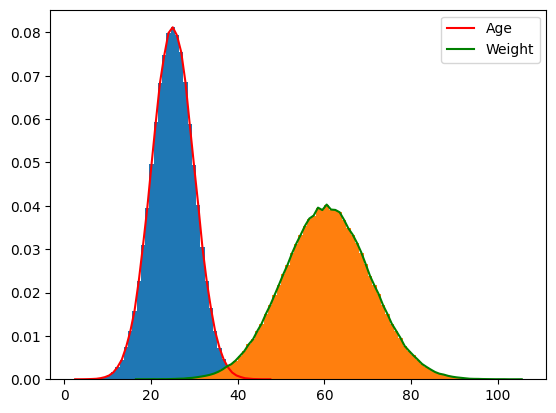

In [34]:
import scipy.stats as stats
# TODO: use plt.hist() and bins = len(np.unique()) in order to visualize the distribution
n,x,_ = plt.hist(X, bins = len(np.unique(X)), density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers, n, color = 'red', label = 'Age')

n,x,_ = plt.hist(Y, bins = len(np.unique(Y)), density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, color = 'green', label = 'Weight')

plt.legend()
plt.show()

**d)** What is the probability of observing an age of 80 or higher?  

HINT: To calculate the probability we have to use the probability density function of normal distribution for $X$, in range $[80,\infty)$. Calculate the sample PDF and the expected PDF given that the distribution is normal with ($\mu_Y=60,\sigma_Y=10$). How close are these two values?

**Answer**

In [111]:
 # TODO: find the probability that age is >80 (PDF), then find the expected PDF of the normal distribution (μ=60,σ=10) and compare the results
Y_greater_80 = Y[Y>80]
pdf = (len(Y_greater_80)/len(Y))
print(f'Sampled PDF is {pdf}')
#to get any range ex {80-X}
y1 = scipy.stats.norm(y_mean, y_variance**(1/2)).cdf(float('inf'))
y2 = scipy.stats.norm(y_mean, y_variance**(1/2)).cdf(80)
epdf = y1-y2
print(f'Expected PDF is {epdf}')
#to get 80-inf
print(1-scipy.stats.norm(y_mean, y_variance**(1/2)).cdf(80))
print(np.abs(pdf-epdf))

Sampled PDF is 0.02016
Expected PDF is 0.022759418529548325
0.022759418529548325
0.0025994185295483245


**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [107]:
# TODO: Compute 2-Dimensional mean is the vector (E[X], E[Y])
Z = np.c_[X, Y]
n, d = Z.shape
mu = np.mean(Z, axis=0, keepdims=True)
cov = (Z - mu).T @ (Z - mu)/n

# TODO: The diagonal of the Covariance matrix must equal the initial covariance values of X and Y. Check your results.
print("Mean:\n", mu)
print("Cov: \n", cov)


Mean:
 [[25.005264 60.002704]]
Cov: 
 [[ 2.50500603e+01 -5.56962339e-02]
 [-5.56962339e-02  9.99901567e+01]]


**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

**range normalization**:

$x_i^{'} = \frac{x_i-\min_i{x_i}}{\max_i{x_i} - \min_i{x_i}}$

In [8]:
# TODO: Compute the range normalization: (x_i - min)/(max - min)
min_z = Z.min(0, keepdims=True)
max_z = Z.max(0, keepdims=True)
Z_normalize = (Z - min_z) / (max_z - min_z)
print("Range normalized: \n", Z_normalize)

Range normalized: 
 [[0.67391304 0.56666667]
 [0.43478261 0.27777778]
 [0.43478261 0.43333333]
 ...
 [0.56521739 0.42222222]
 [0.32608696 0.62222222]
 [0.56521739 0.52222222]]


**g)** Normalize the data with _standard score normalization_ such that is has mean 0 and standard deviation 1.  

**z-score**:

$x_i^{'} = \frac{x_i-\hat{\mu}}{\hat{\sigma}}$

In [71]:
# TODO: #  Compute the standard score normalization:, x_i = (x_i - mu)/(sigma)
X_ssn = [(x - x_mean)/np.sqrt(x_variance) for x in X]
# Cheating and computing mean of Y with Numpy
Y_ssn = [(y - np.mean(Y))/np.sqrt(y_variance) for y in Y]
print(np.mean(Y_ssn), np.std(Y_ssn))
print(np.mean(X_ssn), np.std(X_ssn))

-1.283844142108137e-16 1.0
-7.653255806872039e-17 1.0


## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers
 - Median is robust against outliers
 - Standard deviation is robust against outliers


**Answer:**



 - Mean is robust against outliers 
 
      **False**: We say that a statistic is robust if it is not affected by extreme values (such as outliers) in the data. The sample mean is unfortunately not robust because a single large value (an outlier) can skew the average.
 
 <em>Data Mining and Analysis Page 47</em>
 - Median is robust against outliers
 
      *True：* It is not affected by extreme values

- Standard deviation is robust against outliers

    **False**: Standard deviation $\sigma = \sqrt\frac{\sum(x_i-\mu)^2}{N}$, it could influenced by each $x_i$ 
      

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

**Answer:**

It is not affected by extreme values

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 


**Answer:**

Determine if two categorical variables are independent or if they are in fact related to one another. If two categorical variables are independent, then the value of one variable does not change the probability distribution of the other. If two categorical variables are related, then the distribution of one depends on the level the other. This test measures the differences in the observed conditional distribution of one variable across levels of the other, and compares it to the marginal (overall) distribution of that variable.


## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.11](graphics/3.11.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes, including the row and column counts.<br>
**b)** Construct the expected table between the discretized $X_1$ and $X_2$ attributes.<br>
**c)** Compute the $\chi^2$ statistic between them.<br>
**d)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.10](graphics/3.10.png)

**Answer:**
**a)**


In [109]:

X_1 = [0.3, -0.3, 0.44, -0.60, 0.40, 1.20, -0.12, -1.60, 1.60, -1.32]
X_2 = ["a", "b", "a", "a", "a", "b", "a", "b", "b", "a"]
# For sanity's sake, use code to bin X_1
# Converting everything to numbers allow us to index in them for easier computation
X_tmp = []
for x in X_1:
    if x >= -2 and x <= -0.5:
        X_tmp.append(0)
    elif x >= -0.5 and x <= 0.5:
            X_tmp.append(1)
    elif x > 0.5:
            X_tmp.append(2)
X_1 = X_tmp
X_2 = [0 if x == "a" else 1 for x in X_2]
print(f"X1: {X_1}")
print(f"X2: {X_2}")    

# Our table looks like
## Bins: a b
## bin1
## bin2
## bin3
b1_row = [0, 0]
b2_row = [0, 0]
b3_row = [0, 0]
count_row = [0, 0, 0] # THIS ONE is for column counts
c_table = [b1_row, b2_row, b3_row]
# TODO: Compute contingency table c_table 

for i in range(len(X_1)):
    x1_index = X_1[i]
    x2_index = X_2[i]
    c_table[x1_index][x2_index] += 1





print(f"Our table before row counts: {c_table}")   

X1: [1, 1, 1, 0, 1, 2, 1, 0, 2, 0]
X2: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
Our table before row counts: [[2, 1], [4, 1], [0, 2]]


Table: Contingency table

|  | [-2,-0.5] | [-0.5,0.5] | [0.5, 2] |row counts|
|---|-----------|------------|----------|----|
| a | 2         |4          |0      | 6  |
| b | 1         |1          |2         | 4  |
| column counts  | 3         | 5          | 2        | 10 |



**Answer:**
**b)**

In [18]:
# Now add row counts
# Remember these are reference variables, so modifying these
# will also modify our table

# TODO: Compute expected table
E = [[0, 0] for _ in range(3)]
b1_row.append(sum(b1_row))
b2_row.append(sum(b2_row))
b3_row.append(sum(b3_row))
c_table.append([b1_row[i] + b2_row[i] + b3_row[i] for i in range(3)])

"""
print(f"Our contingency table:")
print(".......a, b, counts")
print(f"bin1: {b1_row}")
print(f"bin2: {b2_row}")
print(f"bin3: {b3_row}")
print(f"count: {c_table[3]}")
"""

# Construct matrix of e_{i,j} needed for Chi^2
E = [[0, 0] for _ in range(3)]
for i in range(3):
    for j in range(2):
        E[i][j] = (c_table[i][2] * c_table[3][j])/(len(X_1))
        


print(f"The expected table is: {E}")

The expected table is: [[1.8, 1.2], [3.0, 2.0], [1.2, 0.8]]


**Answer:**
**c)**
|  | [-2,-0.5] | [-0.5,0.5] | [0.5, 2] |row counts|
|---|-----------|------------|----------|----|
| a | 1.8         |3          |1.2       | 6  |
| b | 1.2         |2          |0.8         | 4  |
| column counts  | 3         | 5          | 2        | 10 |


In [19]:
# TODO: Compute Chi_squared
Chi_squared = 0
print(f"Chi_squared is: {Chi_squared}")
for i in range(3):
    for j in range(2):
        Chi_squared += ((c_table[i][j]-E[i][j])**2)/(E[i][j])
print(f"Chi_squared is: {Chi_squared}")



Chi_squared is: 0
Chi_squared is: 3.8888888888888884


**Answer:**
**d)**

null hypothesis $H_0$, $X_1$ and $X_2$ are independent

**Chi-square**

$X^2 = \sum_{i_1}^{m_1}\sum_{j_1}^{m_2} \frac{(n_{ij}-e_{ij})^2}{e_{ij}}$

$X^2 = 0.022+0.333+0+0.333+0.5+1.8 = 3.886$

**degree of freedom**

$q = (2-1)*(3-1) = 2$

**cirtical value** by table $= 5.991$

$X^2 \le 5.991 $ it accept the null hypothesis

## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances?
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$?






**Answers:**

    1. dist(x,z)  ≤ dist(x, y) + dist(y, z)
A1. $d(p_1,p_4)\leq d(p_1,p_3)+d(p_3,p_4)$ ->$d(p_1,p_4)\leq 3$\
$d(p_1,p_4)\leq d(p_1,p_2)+d(p_2,p_4)$ ->$d(p_1,p_4)\leq 1+d(p_2,p_4)$\
$d(p_2,p_3)\leq d(p_2,p_1)+d(p_1,p_3) $->$d(p_2,p_3)\leq 3$\
$d(p_2,p_4)\leq d(p_2,p_1)+d(p_1,p_4)\leq d(p_1,p_2)+d(p_1,p_3)+d(p_3,p_4)$->$d(p_1,p_2)+d(p_1,p_4)\leq 4$\


$2.$
Yes, since $p_4$ can be closer to $p_1$ than $p_3$ but also the opposite scenario
 

$3.$
Yes $p_4$ can be equal to $p_2$.

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

**Answer:**

It is not robust, as a single outlier can skew the mean absolute deviation. (Similar to mean and variance)

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. And we know that the correlation between $X$
and $Y$ is zero.
1. What can you infer about the values of $Y$? (Find a relationship between $a$, $b$ and $c$)
2. If we know there is a missing row, what can we infer about it?

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|

**Answer**

    1. since it is independent, we have

$E[XY] = E[X]E[Y]$

and

$E[XY] = \frac{a+c}{5}$

$E[X] = \frac{2}{5}$

$E[Y] = \frac{2a+b+2c}{5}$

We have $\frac{a+c}{5}=\frac{2}{5}\cdot\frac{2a+b+2c}{5}$

solve this we got, $2b=a+c$



    2.
|  | 1 | 0 |
|-----|---|---|
| a   | 1 | 1 |
| b   | - | 1 |
| c   | 1 | 1 |

from the contigency table we could figure $[1,b]$ are now empty and could add one more line.


# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](./graphics/3.9.png)

In [101]:
import scipy.stats.contingency
from scipy.stats import chi2_contingency
# TODO: Compute contingency using chi2_contingency
xy = np.array([[40,25],[40,35]])
chi=chi2_contingency(xy)
chi2 = np.sum((xy - chi[3])**2/chi[3])
print(chi2)
#print(x)

0.957264957264956
Chi2ContingencyResult(statistic=0.6515384615384604, pvalue=0.4195631759021463, dof=1, expected_freq=array([[37.14285714, 27.85714286],
       [42.85714286, 32.14285714]]))


We obtain $\chi^2 = 0.957$. With one degree of freedom, we have $\chi^2$ being at left of the $1-0.95=0.05$ critical $\chi^2$. Thus we cannot reject the null hypothesis, and we concludethat the two variables are independent.

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.

**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.11](graphics/3.11.png)



In [75]:
fine = np.array([[0.3,1,0],[-0.3,0,1],[0.44,1,0],[-0.6,1,0],[0.4,1,0],[1.2,0,1],[-0.12,1,0],[-0.16,0,1],[1.6,0,1],[-1.32,1,0]])
# TODO: compute the mean vector
mu = np.mean(fine, axis=0)
print("mean vector:\n", mu)

mean vector:
 [0.144 0.6   0.4  ]


In [85]:
import numpy as np
n, d = fine.shape
# TODO: compute the covariance matrix
cov = (fine - mu).T @ (fine - mu)/(n-1)
print(f"Cov: {cov}")
#print(f"Cov1: {np.cov(fine.T)}")

Cov: [[ 0.71873778 -0.196       0.196     ]
 [-0.196       0.26666667 -0.26666667]
 [ 0.196      -0.26666667  0.26666667]]
Cov1: [[ 0.71873778 -0.196       0.196     ]
 [-0.196       0.26666667 -0.26666667]
 [ 0.196      -0.26666667  0.26666667]]
